<img src="https://www.strath.ac.uk/media/1newwebsite/webteam/logos/xUoS_Logo_Horizontal.png.pagespeed.ic.M6gv_BmDx1.png" width="350" align="left" style="left">

# 4. Complex Representation of QAM <a class="anchor" id="complex_QAM"></a>

The QAM model we have looked at so far has used two real signals as the input, however a complex representation is also possible. This model is functionally identical to the previous model, however it is simpler to implement as only a single mixer is required.

## Table of Contents

* [4. Complex Representation of QAM](04_complex_QAM.ipynb)
    * [4.1 Complex Modulation](#complex_QAM_mod)
    * [4.2 Complex Demodulation](#complex_QAM_demod)

**Import Libraries**

For this notebook we will be using NumPy for computation and MatplotLib for Matlab-like visualisation of our waveforms as well as pystrath_sdr helper functions for plots.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from pystrath_sdr.helper_functions import subplots, multi_subplots, complex_subplots, find_fft

### 4.1 Complex Modulation <a class="anchor" id="complex_QAM_mod"></a>

Consider a complex baseband notation, shown as [Figure 1](#fig-1):

<a class="anchor" id="fig-1"></a>
<figure>
<img src='./images/Complex_Mod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 1: Complex Modulation</b></figcaption>
</figure>

where:

$g(t) = g_{1}(t) + jg_{2}(t)$

and $g_{1}$ and $g_{2}$ are the same signals used in the QAM modulation example.

$g_{1}(t) = 200\cos(2 \pi 20000 t)$

$g_{2}(t) = 200\cos(2 \pi 10000 t)$

First we define the two information signals, as seen in the previous notebook.

In [5]:
fs = 1000000 # sample rate 
fb = 20000 # the frequency of the baseband signal
fb2 = 10000
fc = 300000 # frequency of the carrier signal
A = 200 # baseband signal amplitude
n_window = fs # fft size

In [6]:
samples = np.arange(fs) # the points on the x axis for plotting - 0 to fs
t = samples/fs #samples per sampling rate - amount of time passed to process number of samples - array

freqs = np.fft.fftshift(np.fft.fftfreq(n_window,1/fs)) #frequency domain axis for graphs

In [20]:
g1 = 200*np.cos(2*np.pi*fb*t)
g2 = 100*np.cos(2*np.pi*fb2*t)

We now define the complex signal g(t) by summing together $g_{1}(t)$ and a complex signal, $g_{2}(t)$

In [ ]:
g_complex = g1 + 1j*(g2)

If we plot this complex information signal as before, we can observe that the information signal matches $g_{1}$ and $g_{2}$ previously shown in the QAM example.

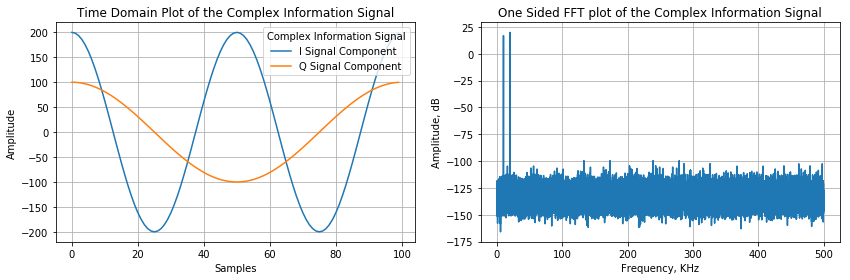

In [8]:
g_complex_fft_db = find_fft(g_complex, n_window)

time_title = 'Time Domain Plot of the Complex Information Signal'
freq_title = 'One Sided FFT plot of the Complex Information Signal'
label_I = 'I Signal Component'
label_Q = 'Q Signal Component'
legend_title = 'Complex Information Signal'

complex_subplots(g_complex.real, g_complex.imag, g_complex_fft_db, samples, freqs, fs,
                 label_I, label_Q, time_title, freq_title, legend_title)

This complex information signal can be modulated using a complex exponential at a 'frequency' of $f_{c}$ Hz:

$e^{j 2 \pi f_{c} t} = \cos (2 \pi f_{c} t) + j \sin (2 \pi f_{c} t)$

In [9]:
c_complex = np.exp(1j*2*np.pi*fc*t)

We can observe that this is equivalant to the carrier signal used previously.

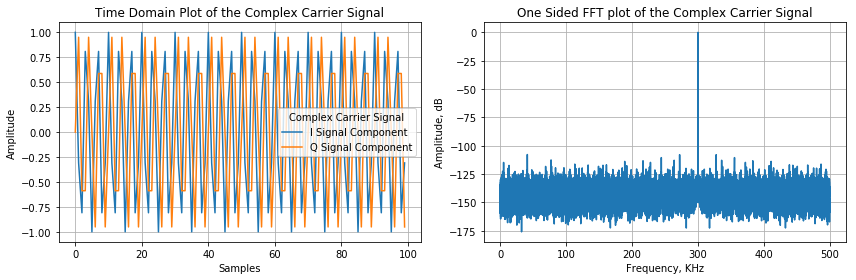

In [10]:
c_complex_fft_db = find_fft(c_complex, n_window)

time_title = 'Time Domain Plot of the Complex Carrier Signal'
freq_title = 'One Sided FFT plot of the Complex Carrier Signal'
label_I = 'I Signal Component'
label_Q = 'Q Signal Component'
legend_title = 'Complex Carrier Signal'

complex_subplots(c_complex.real, c_complex.imag, c_complex_fft_db, samples, freqs, fs,
                 label_I, label_Q, time_title, freq_title, legend_title)

This modulator creates the following signal, achieved by multiplying $g(t)$ with $e^{j 2 \pi f_{c} t}$:

$v(t) = g(t)e^{j 2 \pi f_{c} t} = [g_{1}(t) + jg_{2}(t)]e^{j 2 \pi f_{c} t}$

$v(t) = [g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)] + j [g_{1}(t) \sin (2 \pi f_{c} t) + g_{2}(t) \cos(2 \pi f_{c} t)]$

In [11]:
v = g_complex*c_complex

The real part only is then retained and the imaginary part is removed using a Real operator leaving:

$y(t) = g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)$

In [12]:
y = v.real

We can observe from the below plots that this is mathematically identical to the combined QAM modulator $y(t)$ found in the QAM example.

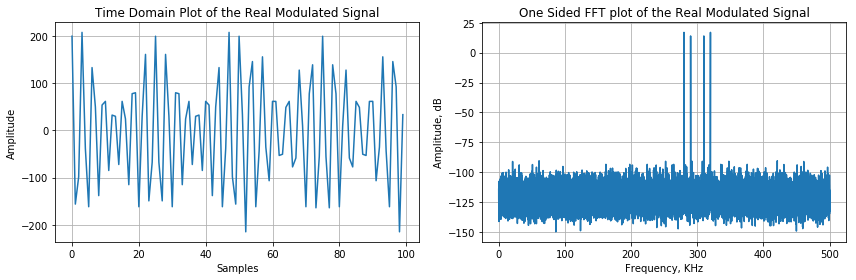

In [13]:
y_fft_db = find_fft(y, n_window)

time_title = 'Time Domain Plot of the Real Modulated Signal'
freq_title = 'One Sided FFT plot of the Real Modulated Signal'
subplots(y[0:fs], y_fft_db, samples, freqs, fs, time_title, freq_title)

### 4.2 Complex Demodulation <a class="anchor" id="complex_QAM_demod"></a>

QAM Demodulation can also be expressed using a complex notation, shown in [Figure 2](#fig-2).:

<a class="anchor" id="fig-2"></a>
<figure>
<img src='./images/Complex_Demod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 2: Complex Demodulation</b></figcaption>
</figure>

Where:

$x(t) = y(t)e^{j 2 \pi f_{c} t} = [g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)]e^{j 2 \pi f_{c} t}$

$x(t) = 0.5[g_{1}(t) + jg_{2}] + 0.5(g_{1}(t) \cos(4 \pi f_{c} t) - j0.5(g_{2}(t) \cos(4 \pi f_{c} t) - j0.5(g_{1}(t) \sin(4 \pi f_{c} t) - 0.5(g_{2}(t) \sin(4 \pi f_{c} t)$

In [14]:
complex_demod_carrier = np.exp(-1j*2*np.pi*fc*t)
x = y*complex_demod_carrier

From the plot of this demodulated signal we can see that the unwanted high frequency components are most obvious in the time domain spectrum, occuring at $4 \pi f_{c} t$.

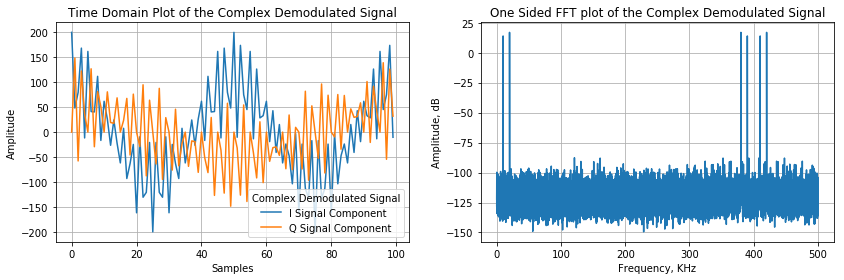

In [15]:
x_fft_db = find_fft(x, n_window)

time_title = 'Time Domain Plot of the Complex Demodulated Signal'
freq_title = 'One Sided FFT plot of the Complex Demodulated Signal'
label_I = 'I Signal Component'
label_Q = 'Q Signal Component'
legend_title = 'Complex Demodulated Signal'

complex_subplots(x.real, x.imag, x_fft_db, samples, freqs, fs,
                 label_I, label_Q, time_title, freq_title, legend_title)

As before, we can apply a low pass filter to this signal to remove the unwanted components. This leaves:

$z(t) = 0.5[g_{1}(t) + jg_{2}]$ 

In [16]:
f_cutoff = 0.1 # Cutoff frequency as a fraction of the sampling rate
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).

N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # N is odd.
n = np.arange(N)

h = np.sinc(2 * f_cutoff * (n - (N - 1) / 2)) # Compute sinc filter.
w = np.blackman(N) # Compute Blackman window.
h = h * w # Multiply sinc filter by window.
h = h / np.sum(h) # Normalize to get unity gain.

In [18]:
z = np.convolve(x, h)

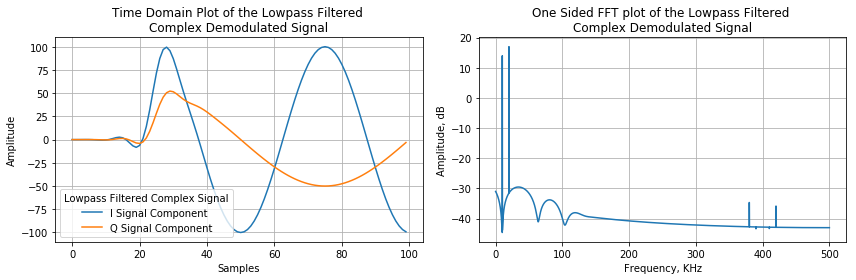

In [19]:
z_fft_db = find_fft(z, n_window)

time_title = 'Time Domain Plot of the Lowpass Filtered \nComplex Demodulated Signal'
freq_title = 'One Sided FFT plot of the Lowpass Filtered \nComplex Demodulated Signal'
label_I = 'I Signal Component'
label_Q = 'Q Signal Component'
legend_title = 'Lowpass Filtered Complex Signal'

complex_subplots(z.real, z.imag, z_fft_db, samples, freqs, fs, label_I, label_Q, time_title, freq_title, legend_title)

These two QAM architectures are mathematically identical, however the complex representation is an easier architecture to work with, and working with complex exponentials is much easier and more tractable than working with the cosine and standard QAM form.

[⬅️ Previous Notebook](03_QAM_modulation.ipynb) | | [Next Notebook ➡️](05_conclusion.ipynb)

----
----